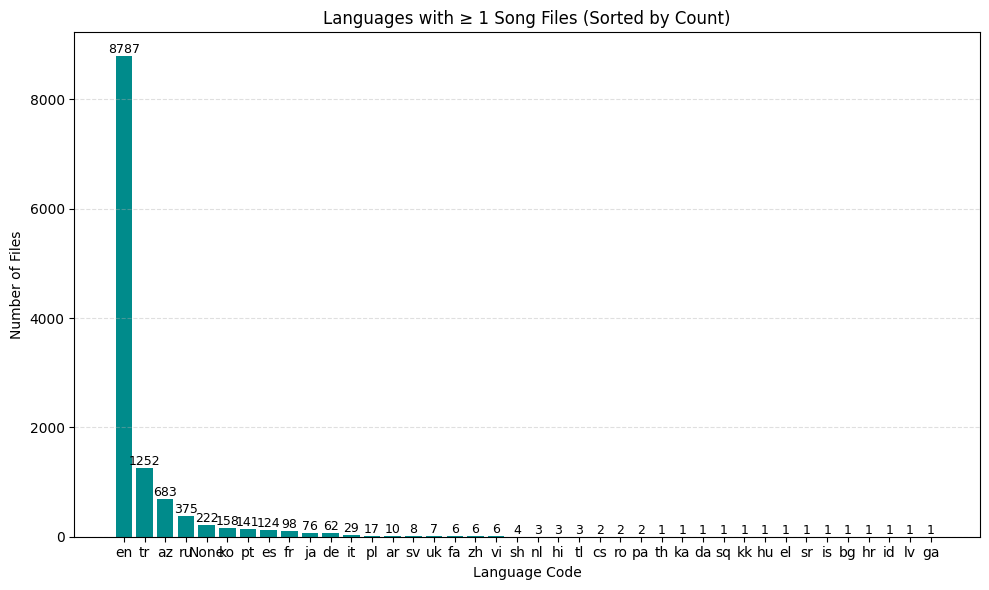

In [ ]:
import json
import matplotlib.pyplot as plt

threshold = 1  # Minimum number of files to include

# Load and filter data
with open('tracks/language_mapping_trh-0.6.json', encoding='utf-8') as f:
    filtered = ((lang, len(files)) for lang, files in json.load(f).items() if len(files) >= threshold)
    sorted_data = sorted(filtered, key=lambda x: x[1], reverse=True)

# Unpack language codes and counts
langs, counts = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(langs, counts, color='darkcyan')

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

plt.title(f'Languages with ≥ {threshold} Song Files (Sorted by Count)')
plt.xlabel('Language Code')
plt.ylabel('Number of Files')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
from utils import load_jsons_data

load_jsons_data('with_lyrics', ["popularity"])


,popularity
0,49
1,4
2,62
3,33
4,47
...,...
12095,62
12096,0
12097,65
12098,52


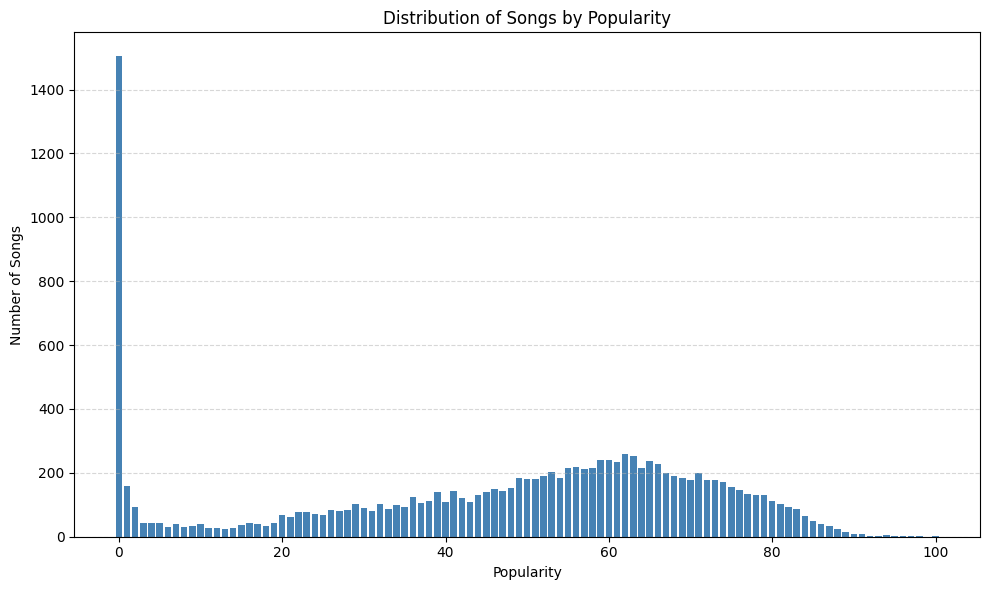

In [21]:
# Load data (assuming a custom function)
df = load_jsons_data('with_lyrics', ['popularity'])

# Count number of songs for each popularity level
popularity_counts = df['popularity'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(popularity_counts.index, popularity_counts.values, color='steelblue')

plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()